In [2]:
import pandas as pd

In [4]:
data=pd.read_csv('rbi_payment_data_as_on_aug_2019.csv')
data['bank_name'] = data['bank_name'].apply(lambda name : name.upper())
data.head()

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,November,2011,11,2011-11-01,2011-11-30,ALLAHABAD BANK,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.0,102.5
1,November,2011,11,2011-11-01,2011-11-30,ANDHRA BANK,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.4,451.1
2,November,2011,11,2011-11-01,2011-11-30,BANK OF BARODA,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.7,695.3
3,November,2011,11,2011-11-01,2011-11-30,BANK OF INDIA,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.8,624.8
4,November,2011,11,2011-11-01,2011-11-30,BANK OF MAHARASHTRA,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.3,216.1


In [5]:
#Check number of rows and columns in dataframe
data.shape

(5592, 20)

In [6]:
#Check number of categorical variables
categorical_var=data.select_dtypes(include='object')
print(categorical_var.shape)

(5592, 4)


In [7]:
#Check number of numerical variables
numerical_var=data.select_dtypes(include='number')
print(numerical_var.shape)

(5592, 16)


In [8]:
#Check number of missing values in each columns
data.isnull().sum()

month                                 0
year                                  0
month_number                          0
start_date                            0
end_date                              0
bank_name                             0
no_atms_on_site                       0
no_atms_off_site                      0
no_pos_on_line                        0
no_pos_off_line                       1
no_credit_cards                       3
no_credit_card_atm_txn                0
no_credit_card_pos_txn                0
no_credit_card_atm_txn_value_in_mn    0
no_credit_card_pos_txn_value_in_mn    0
no_debit_cards                        0
no_debit_card_atm_txn                 0
no_debit_card_pos_txn                 0
no_debit_card_atm_txn_value_in_mn     0
no_debit_card_pos_txn_value_in_mn     0
dtype: int64

How to deal with Missing values:-

1)First choice you can remove all mising values of columns


2)Replace that missing value with mean , median , or mode value of that column
italicized text

In [9]:
#Here no_pos_off_line has 1 missing value....if you want then you can drop the column also..but I am 
#here replacing it with the mean value of that column
data['no_pos_off_line'] = data['no_pos_off_line'].fillna(data['no_pos_off_line'].mean())

In [10]:
#Here no_credit_cards has 3 missing values in it , so I replace it with it's mean value of that column..
#you can also drop column
data['no_credit_cards'] = data['no_credit_cards'].fillna(data['no_credit_cards'].mean())

In [11]:
#Again check all the missing values are gone now.
data.isnull().sum()

month                                 0
year                                  0
month_number                          0
start_date                            0
end_date                              0
bank_name                             0
no_atms_on_site                       0
no_atms_off_site                      0
no_pos_on_line                        0
no_pos_off_line                       0
no_credit_cards                       0
no_credit_card_atm_txn                0
no_credit_card_pos_txn                0
no_credit_card_atm_txn_value_in_mn    0
no_credit_card_pos_txn_value_in_mn    0
no_debit_cards                        0
no_debit_card_atm_txn                 0
no_debit_card_pos_txn                 0
no_debit_card_atm_txn_value_in_mn     0
no_debit_card_pos_txn_value_in_mn     0
dtype: int64

In [12]:
#Check unique values in each column
for i in data.columns:
  print(data[i].unique())

['November' 'October' 'September' 'August' 'July' 'June' 'May' 'April'
 'December' 'January' 'February' 'March']
[2011 2012 2013 2014 2015 2016 2017 2018 2019]
[11 10  9  8  7  6  5  4 12  1  2  3]
['2011-11-01' '2011-10-01' '2011-09-01' '2011-08-01' '2011-07-01'
 '2011-06-01' '2011-05-01' '2011-04-01' '2011-12-01' '2012-01-01'
 '2012-02-01' '2012-03-01' '2012-04-01' '2012-05-01' '2012-06-01'
 '2012-07-01' '2012-08-01' '2012-09-01' '2012-11-01' '2012-12-01'
 '2013-01-01' '2013-02-01' '2013-04-01' '2013-03-01' '2013-05-01'
 '2013-06-01' '2013-07-01' '2013-08-01' '2013-09-01' '2013-10-01'
 '2013-11-01' '2014-01-01' '2013-12-01' '2014-02-01' '2014-04-01'
 '2014-03-01' '2014-05-01' '2014-06-01' '2014-08-01' '2014-10-01'
 '2014-09-01' '2014-07-01' '2014-11-01' '2014-12-01' '2015-01-01'
 '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01' '2015-06-01'
 '2015-08-01' '2015-07-01' '2015-09-01' '2015-10-01' '2015-11-01'
 '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01' '2016-04-01'
 '2016-05-

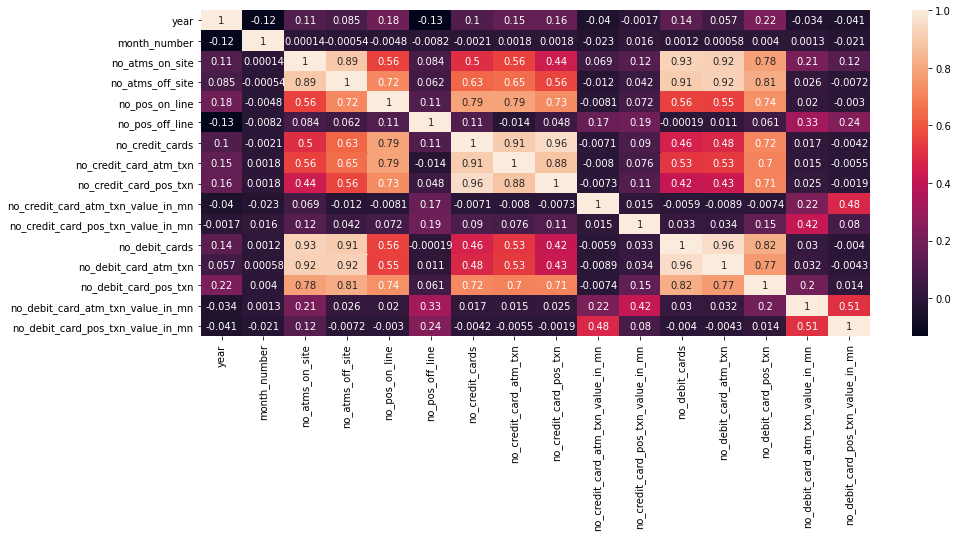

In [13]:
#Check correlation between numerical columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
#Check all names of columns
data.columns

Index(['month', 'year', 'month_number', 'start_date', 'end_date', 'bank_name',
       'no_atms_on_site', 'no_atms_off_site', 'no_pos_on_line',
       'no_pos_off_line', 'no_credit_cards', 'no_credit_card_atm_txn',
       'no_credit_card_pos_txn', 'no_credit_card_atm_txn_value_in_mn',
       'no_credit_card_pos_txn_value_in_mn', 'no_debit_cards',
       'no_debit_card_atm_txn', 'no_debit_card_pos_txn',
       'no_debit_card_atm_txn_value_in_mn',
       'no_debit_card_pos_txn_value_in_mn'],
      dtype='object')

**Feature Engineering**

In [15]:
#Total ATM
data['total_atm']=data['no_atms_on_site']+data['no_atms_off_site']
#Total POS
data['total_pos']=data['no_pos_on_line']+data['no_pos_off_line']
#Total ATM Card Transaction
data['total_atm_card_txn']=data['no_credit_card_atm_txn']+data['no_debit_card_atm_txn']
#Total POS Card Transaction
data['total_pos_card_txn']=data['no_credit_card_pos_txn']+data['no_debit_card_pos_txn']

In [16]:
#Bank which has highest number of ATM Card
data.groupby('bank_name')[['total_atm']].mean().sort_values(by='total_atm',ascending=False).head()

,total_atm
bank_name,
STATE BANK OF INDIA,43548.929293
ICICI BANK LTD,13663.215385
AXIS BANK LTD,13419.000000
HDFC BANK LTD,12236.569231
AXIS BANK LTD.,9993.285714


In [17]:
#Bank which has highest number of POS Card
data.groupby('bank_name')[['total_pos']].mean().sort_values(by='total_pos',ascending=False).head()

,total_pos
bank_name,
AXIS BANK LTD,366667.184615
HDFC BANK LTD,353198.538462
ICICI BANK LTD,286740.061538
STATE BANK OF INDIA,283341.242424
RATNAKAR BANK LIMITED,222972.276923


In [18]:
#Bank which has highest total atm card transaction
data.groupby('bank_name')[['total_atm_card_txn']].mean().sort_values(by='total_atm_card_txn',ascending=False).head()

,total_atm_card_txn
bank_name,
STATE BANK OF INDIA,2.661475e+08
HDFC BANK LTD,3.365058e+07
ICICI BANK LTD,3.279549e+07
AXIS BANK LTD.,3.236035e+07
ICICI BANK LTD.,2.599900e+07


In [19]:
#Bank name which has highest total pos card transaction
data.groupby('bank_name')[['total_pos_card_txn']].mean().sort_values(by='total_pos_card_txn',ascending=False).head()

,total_pos_card_txn
bank_name,
HDFC BANK LTD,5.737552e+07
STATE BANK OF INDIA,5.455025e+07
ICICI BANK LTD,3.963237e+07
AXIS BANK LTD,2.399068e+07
CITI BANK,1.892961e+07


**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


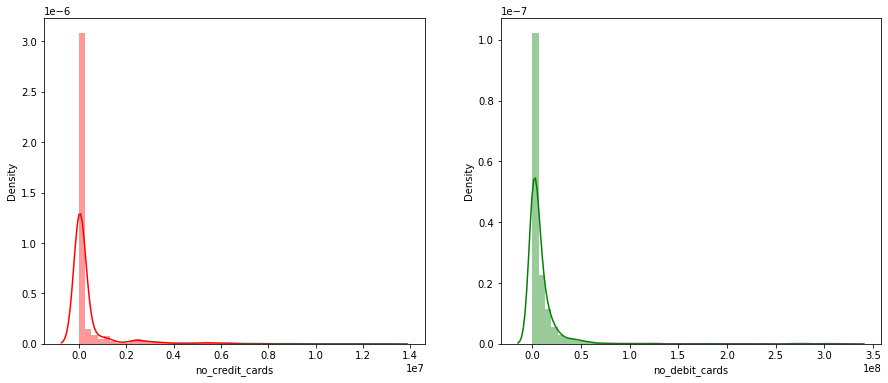

In [20]:
#Total Number of Credit cards and Total Number of Debit Cards
import seaborn as sns
plt.figure(1,figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(data['no_credit_cards'],color='red')
plt.subplot(1, 2, 2)
sns.distplot(data['no_debit_cards'],color='green')
plt.show()

Here we can see, total number of credit cards is more than the total number of debit cards

<Figure size 1440x720 with 0 Axes>

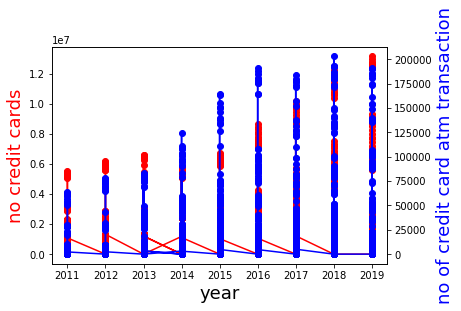

In [21]:
#Trend of Credit Card deployment and transactions over a time
plt.figure(1,figsize=(20,10))
fig,ax = plt.subplots()
# make a plot
ax.plot(data.year, data.no_credit_cards, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=18)
# set y-axis label
ax.set_ylabel("no credit cards",color="red",fontsize=18)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.year, data.no_credit_card_atm_txn,color="blue",marker="o")
ax2.set_ylabel("no of credit card atm transaction",color="blue",fontsize=18)
plt.show()


<Figure size 1440x720 with 0 Axes>

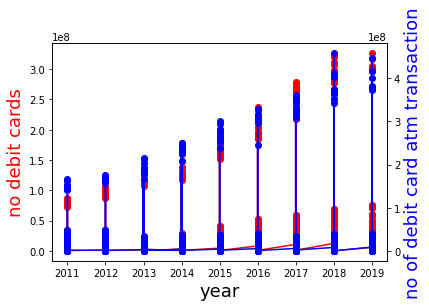

In [22]:
#Trend of Debit Card deployment and transactions over a time
plt.figure(1,figsize=(20,10))
fig,ax = plt.subplots()
# make a plot
ax.plot(data.year, data.no_debit_cards, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=18)
# set y-axis label
ax.set_ylabel("no debit cards",color="red",fontsize=18)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.year, data.no_debit_card_atm_txn,color="blue",marker="o")
ax2.set_ylabel("no of debit card atm transaction",color="blue",fontsize=18)
plt.show()

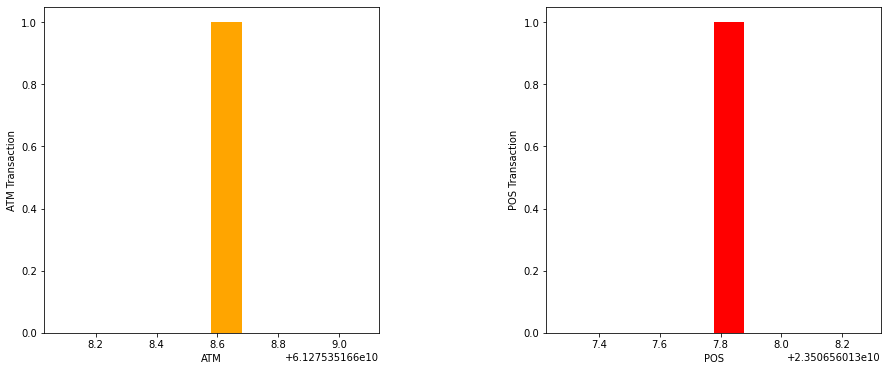

In [23]:
#Card Transaction ATM VS POS
plt.figure(1,figsize=(15,6))
x=data['no_credit_card_atm_txn'].sum() + data['no_debit_card_atm_txn'].sum()
y=data['no_credit_card_pos_txn'].sum() + data['no_debit_card_pos_txn'].sum()
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=1.5,wspace=1.5)
plt.hist(x,color='orange')
plt.xlabel('ATM')
plt.ylabel('ATM Transaction')
plt.subplot(1, 2, 2)
plt.hist(y,color='red')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.xlabel('POS')
plt.ylabel('POS Transaction')
plt.show()

Above figure shows that card transaction with ATM is more than POS

<Figure size 1080x432 with 0 Axes>

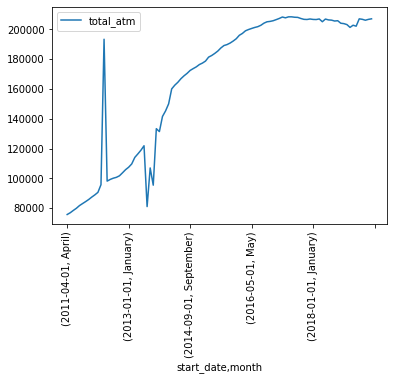

In [24]:
#ATM Deployment Trend
d3=data.groupby(['start_date','month']).agg({'total_atm':sum})
plt.figure(1,figsize=(15,6))
d3.plot()
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

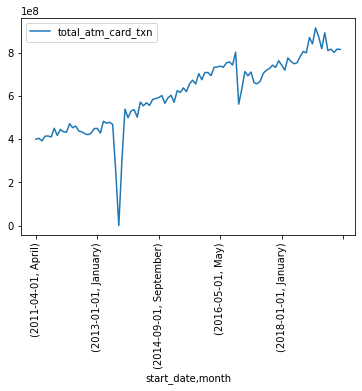

In [25]:
#ATM Transaction Trend
d3=data.groupby(['start_date','month']).agg({'total_atm_card_txn':sum})
plt.figure(1,figsize=(15,6))
d3.plot()
plt.xticks(rotation=90)
plt.show()

Here in above graph we observe following things:-
1)RBI has not published txn data for Aug 2013.
2)Again, the number of txns have grown significantly from Apr'2011 to Nov'2016. But after that there is a sudden drop in txns this is because shortage of bank notes due to demonitization


<Figure size 1080x432 with 0 Axes>

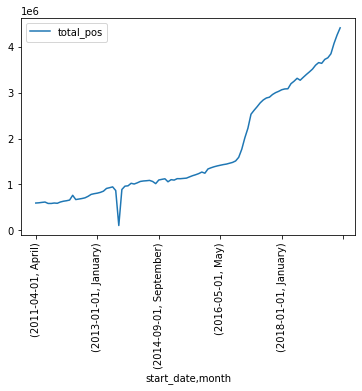

In [26]:
#POS Deployment Trend
d3=data.groupby(['start_date','month']).agg({'total_pos':sum})
plt.figure(1,figsize=(15,6))
d3.plot()
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

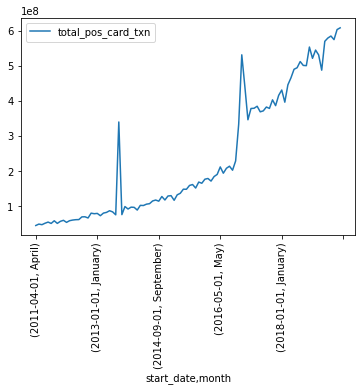

In [27]:
#POS Transaction Trend
d4=data.groupby(['start_date','month']).agg({'total_pos_card_txn':sum})
plt.figure(1,figsize=(15,6))
d4.plot()
plt.xticks(rotation=90)
plt.show()

Here we can see from above graph:-the number PoS terminals deploment and txns have grown from Apr'2011 to Nov'2016. But after that there is a sudden jump in txns and deployment due demonitization

**Check number of ATM , POS  and their transactions for August 2019**

In [28]:
#Store all data for August 2019 in new dataframe 
d1=data[(data['month']=='August') & (data['year']==2019)]
d1.shape

(64, 24)

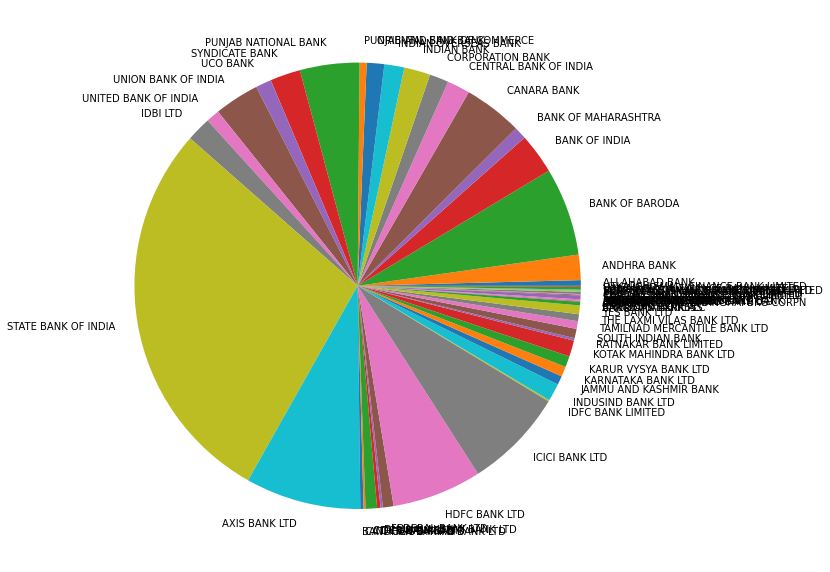

In [29]:
#Check total ATM in All Banks
y=d1['total_atm']
x=d1['bank_name']
plt.figure(1,figsize=(10,101))
plt.pie(y,labels=x)
plt.show()

In [30]:
#Count total number of atms in 2019 August
d1['total_atm'].sum()

207144

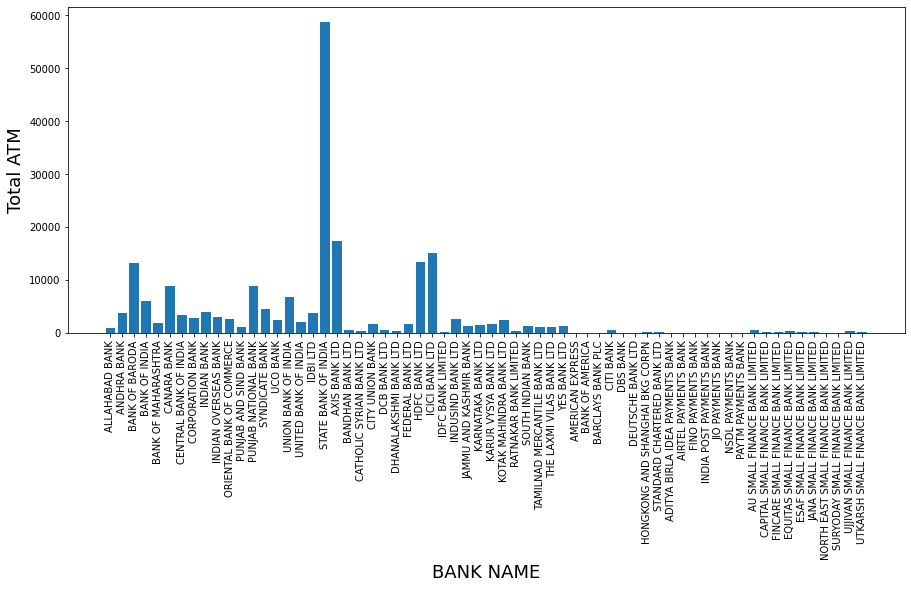

In [56]:
#Total Number of ATM deployed in all banks in August 2019
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
plt.bar(d1['bank_name'],d1['total_atm'])
plt.xticks(rotation=90)
plt.xlabel('BANK NAME',fontsize=18)
plt.ylabel('Total ATM',fontsize=18)
plt.show()

In [32]:
#Count total number of POS in August 2019
d1['total_pos'].sum()

4409250.0

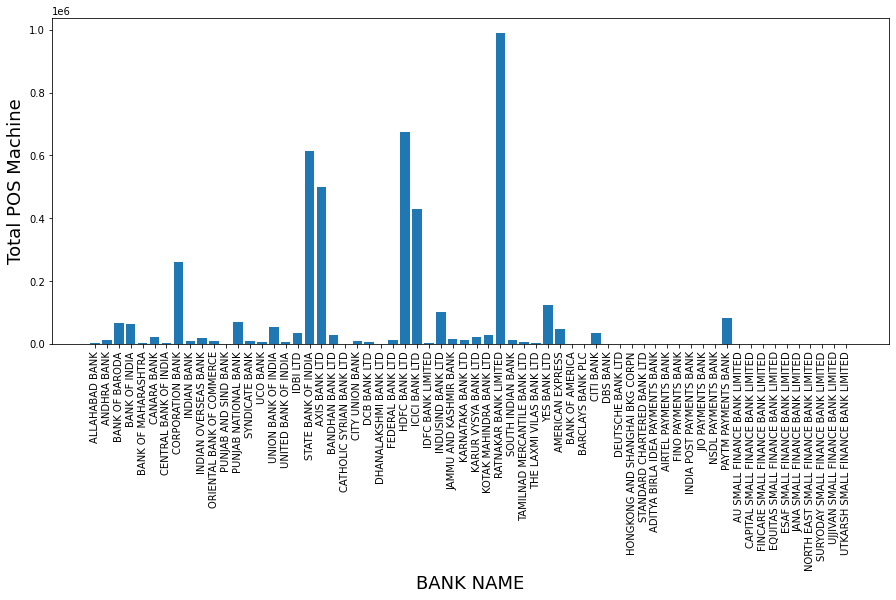

In [57]:
#Total Number of POS deployed in all banks in August 2019
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
plt.bar(d1['bank_name'],d1['total_pos'])
plt.xticks(rotation=90)
plt.xlabel('BANK NAME',fontsize=18)
plt.ylabel('Total POS Machine',fontsize=18)
plt.show()

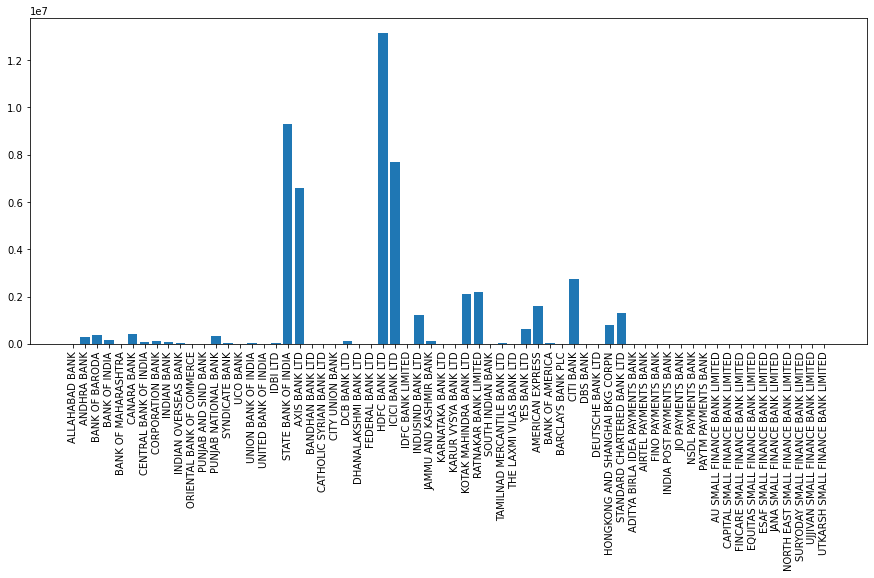

In [34]:
#Total Number of credit card in all banks in August 2019
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
plt.bar(d1['bank_name'],d1['no_credit_cards'])
plt.xticks(rotation=90)
plt.show()

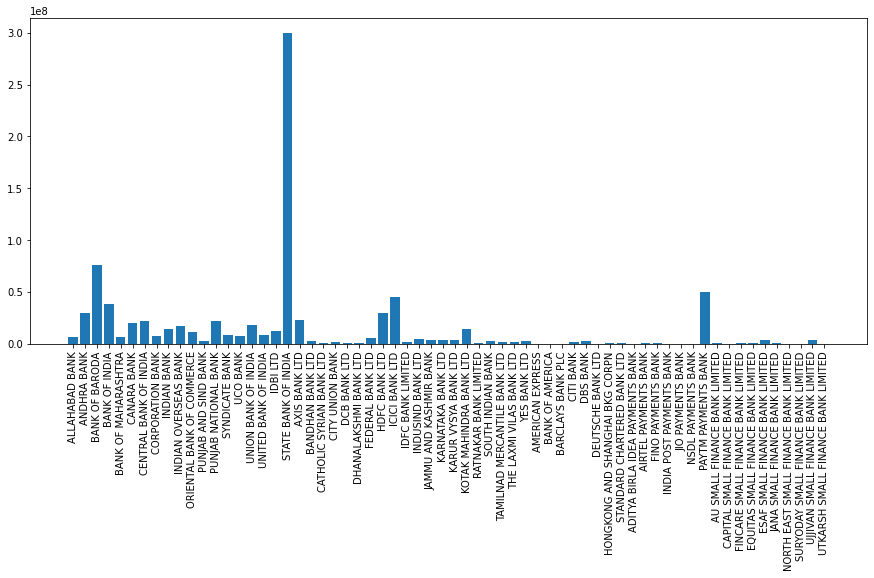

In [35]:
#Total Number of Debit card in all banks in August 2019
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
plt.bar(d1['bank_name'],d1['no_debit_cards'])
plt.xticks(rotation=90)
plt.show()


**Trends of a Specific Bank( STATE BANK OF INDIA)**

         month  year  ...  total_atm_card_txn total_pos_card_txn
19    November  2011  ...         150963969.0          8187008.0
72     October  2011  ...         165892766.0          8944634.0
126  September  2011  ...         147733008.0          8009112.0
180     August  2011  ...         151160483.0          8418804.0
235       July  2011  ...         151979316.0          7845077.0

[5 rows x 24 columns]


<Figure size 1080x432 with 0 Axes>

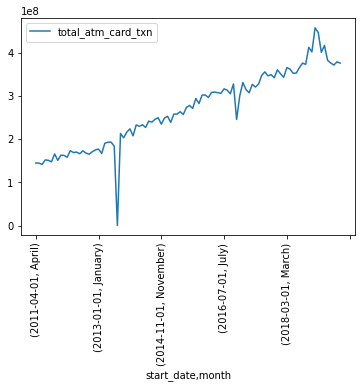

In [36]:
#Trends in State Bank of India
#Check total ATM Card Transaction in SBI
d5=data[data['bank_name']=='STATE BANK OF INDIA']
print(d5.head())
sbi_trends_atm=d5.groupby(['start_date','month']).agg({'total_atm_card_txn':sum})
plt.figure(1,figsize=(15,6))
sbi_trends_atm.plot()
plt.xticks(rotation=90)
plt.show()

                   total_pos_card_txn
start_date month                     
2011-04-01 April            6956188.0
2011-05-01 May              7570662.0
2011-06-01 June             7581490.0
2011-07-01 July             7845077.0
2011-08-01 August           8418804.0


<Figure size 1080x432 with 0 Axes>

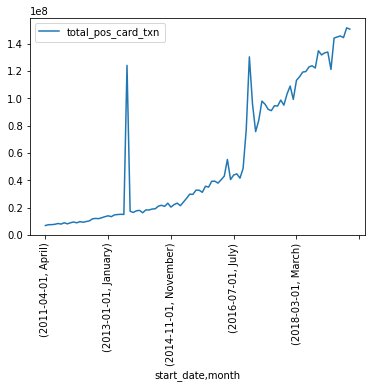

In [37]:
#Total pos card transaction in SBI
sbi_trends_pos=d5.groupby(['start_date','month']).agg({'total_pos_card_txn':sum})
print(sbi_trends_pos.head())
plt.figure(1,figsize=(15,6))
sbi_trends_pos.plot()
plt.xticks(rotation=90)
plt.show()

**Trends in Bank OF Baroda**

In [38]:
#Trends in State Bank of India
#Check total ATM Card Transaction in SBI
d6=data[data['bank_name']=='BANK OF BARODA']
d6.head()

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn,total_atm,total_pos,total_atm_card_txn,total_pos_card_txn
2,November,2011,11,2011-11-01,2011-11-30,BANK OF BARODA,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.7,695.3,1822,4332.0,6717415.0,534370.0
55,October,2011,10,2011-10-01,2011-10-31,BANK OF BARODA,1232,582,4360,0.0,70843.0,1715,80948,1.6,223.3,7156478.0,7114838.0,507555.0,27547.1,923.2,1814,4360.0,7116553.0,588503.0
109,September,2011,9,2011-09-01,2011-09-30,BANK OF BARODA,1215,585,4393,0.0,70851.0,2631,69725,0.8,184.9,7715488.0,5806952.0,396462.0,21145.7,627.4,1800,4393.0,5809583.0,466187.0
163,August,2011,8,2011-08-01,2011-08-31,BANK OF BARODA,1217,582,4364,0.0,71367.0,2863,80650,9.0,205.7,6870992.0,6421457.0,449568.0,23596.6,700.3,1799,4364.0,6424320.0,530218.0
218,July,2011,7,2011-07-01,2011-07-31,BANK OF BARODA,1206,579,4365,0.0,71621.0,2800,79112,1.2,213.7,6719673.0,6422908.0,420933.0,23467.8,640.2,1785,4365.0,6425708.0,500045.0


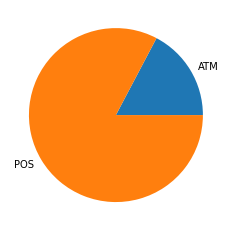

In [39]:
#No of ATM and No of POS in B.O.B
import numpy as np
x=d6['total_atm'].sum()
y=d6['total_pos'].sum()
plt.pie([x,y],labels=['ATM','POS'])
plt.show()

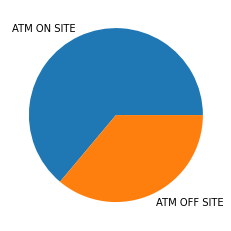

In [40]:
#No of ATM on site and No of ATM off site in B.O.B
import numpy as np
x=d6['no_atms_on_site'].sum()
y=d6['no_atms_off_site'].sum()
plt.pie(np.array([x,y]),labels=['ATM ON SITE','ATM OFF SITE'])
plt.show()

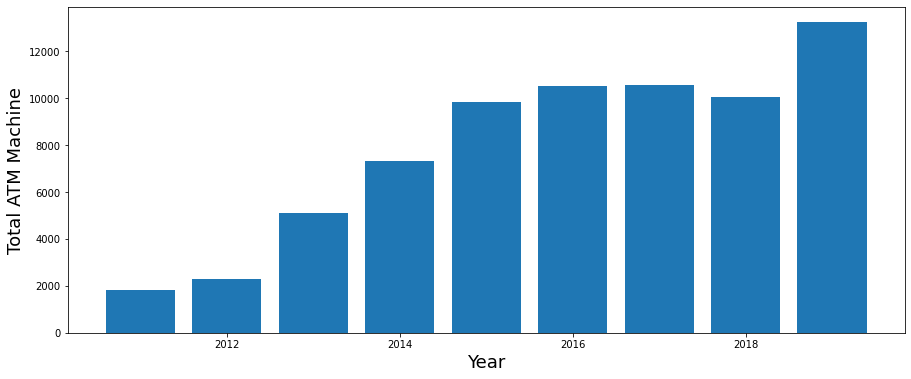

In [55]:
#Total Number of ATM in year
plt.figure(1,figsize=(15,6))
plt.bar(d6['year'],d6['total_atm'])
plt.xlabel('Year',fontsize=18)
plt.ylabel('Total ATM Machine',fontsize=18)
plt.show()

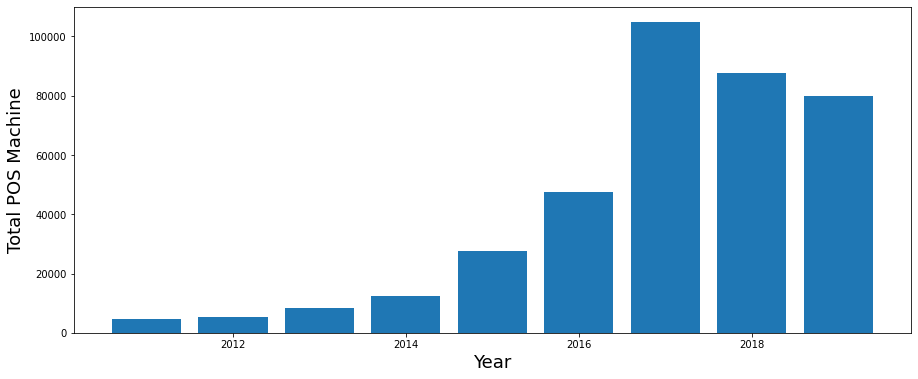

In [42]:
#Total Number of POS Machines in each year
plt.figure(1,figsize=(15,6))
plt.bar(d6['year'],d6['total_pos'])
plt.xlabel('Year',fontsize=18)
plt.ylabel('Total POS Machine',fontsize=18)
plt.show()

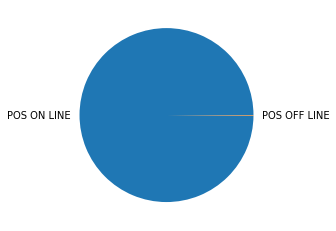

In [43]:
#No of POS on site and No of POS off site in B.O.B
import numpy as np
x=d6['no_pos_on_line'].sum()
y=d6['no_pos_off_line'].sum()
plt.pie(np.array([x,y]),labels=['POS ON LINE','POS OFF LINE'])
plt.show()

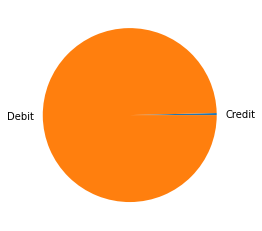

In [44]:
#No of credit card and No of Debit card in B.O.B
import numpy as np
x=d6['no_credit_cards'].sum()
y=d6['no_debit_cards'].sum()
plt.pie([x,y],labels=['Credit','Debit'])
plt.show()

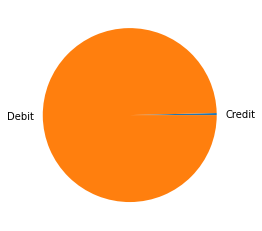

In [45]:
#No of credit card and No of Debit card in B.O.B
import numpy as np
x=d6['no_credit_cards'].sum()
y=d6['no_debit_cards'].sum()
plt.pie([x,y],labels=['Credit','Debit'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


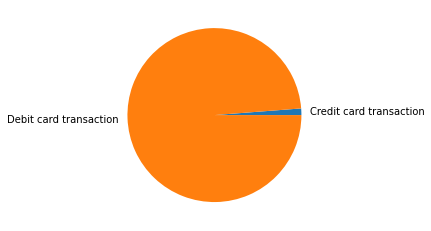

In [46]:
#Credit card Transaction vs Debit card Transaction in B.O.B
import numpy as np
d6['total_credit_card_txn']=d6['no_credit_card_atm_txn']+d6['no_credit_card_pos_txn']
d6['total_debit_card_txn']=d6['no_debit_card_atm_txn']+d6['no_debit_card_pos_txn']
x=d6['total_credit_card_txn'].sum()
y=d6['total_debit_card_txn'].sum()
plt.pie([x,y],labels=['Credit card transaction','Debit card transaction'])
plt.show()

<Figure size 1080x432 with 0 Axes>

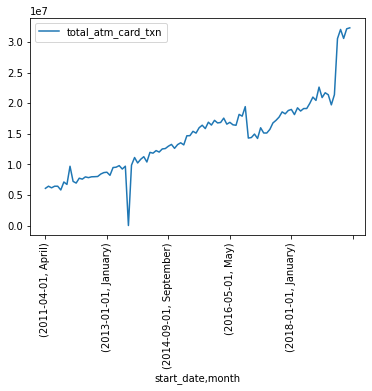

In [47]:
#Trend of ATM Card Transaction in B.O.B
bob_trends_atm=d6.groupby(['start_date','month']).agg({'total_atm_card_txn':sum})
plt.figure(1,figsize=(15,6))
bob_trends_atm.plot()
plt.xticks(rotation=90)
plt.show()

                   total_pos_card_txn
start_date month                     
2011-04-01 April            6956188.0
2011-05-01 May              7570662.0
2011-06-01 June             7581490.0
2011-07-01 July             7845077.0
2011-08-01 August           8418804.0


<Figure size 1080x432 with 0 Axes>

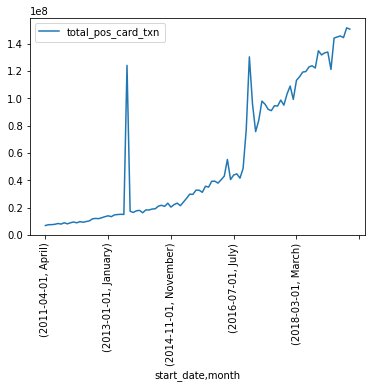

In [48]:
#Trend of POS card transaction in B.O.B
bob_trends_pos=d5.groupby(['start_date','month']).agg({'total_pos_card_txn':sum})
print(bob_trends_pos.head())
plt.figure(1,figsize=(15,6))
bob_trends_pos.plot()
plt.xticks(rotation=90)
plt.show()

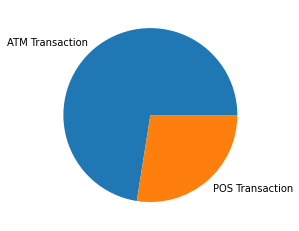

In [49]:
#No of debit card ATM and POS Transaction in Million in B.O.B
import numpy as np
x=d6['no_debit_card_atm_txn_value_in_mn'].sum()
y=d6['no_debit_card_pos_txn_value_in_mn'].sum()
plt.pie([x,y],labels=['ATM Transaction','POS Transaction'])
plt.show()

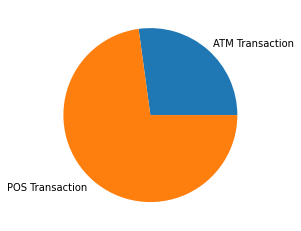

In [50]:
#No of Credit card ATM and POS Transaction in Million in B.O.B
import numpy as np
x=d6['no_credit_card_atm_txn_value_in_mn'].sum()
y=d6['no_credit_card_pos_txn_value_in_mn'].sum()
plt.pie([x,y],labels=['ATM Transaction','POS Transaction'])
plt.show()

In [51]:
#Highest ATM Card transaction year wise and month wise in B.O.B
d6.groupby(['year','month'])[['total_atm_card_txn']].mean().sort_values(by='total_atm_card_txn',ascending=False).head(20)

total_atm_card_txn
year month                        
2019 August             32321648.0
     July               32165381.0
     May                32056709.0
     June               30589176.0
     April              30558914.0
2018 October            22629023.0
     December           21707308.0
2019 March              21390003.0
     January            21382230.0
2018 August             20998258.0
     November           20918844.0
     September          20457499.0
     July               19978284.0
2019 February           19728403.0
2016 October            19438655.0
2018 March              19244860.0
     June               19129936.0
     May                19123416.0
     January            18978963.0
2017 December           18805645.0

In [52]:
#Highest POS Card transaction year wise and month wise in B.O.B
d6.groupby(['year','month'])[['total_pos_card_txn']].mean().sort_values(by='total_pos_card_txn',ascending=False).head(20)

total_pos_card_txn
year month                        
2019 August             20451961.0
     July               19019732.0
     June               18193535.0
     May                17514634.0
     April              17261970.0
2018 June               16667685.0
     May                16198711.0
     October            14259205.0
     April              14057622.0
     July               13614037.0
2019 March              13281613.0
2016 December           13251326.0
2018 December           12944020.0
     March              12914320.0
     September          12796986.0
     November           12771974.0
2019 January            12518470.0
2018 August             12263621.0
     January            11618371.0
2017 January            11527251.0

In [53]:
#Highest Credit Card transaction year wise and month wise in B.O.B
d6.groupby(['year','month'])[['total_credit_card_txn']].mean().sort_values(by='total_credit_card_txn',ascending=False).head(20)

total_credit_card_txn
year month                           
2019 August                  963050.0
     July                    907075.0
     June                    888311.0
     May                     860002.0
     April                   809052.0
     March                   661725.0
     January                 552493.0
     February                535306.0
2018 December                520443.0
     November                460339.0
     October                 453341.0
2016 December                399348.0
2018 August                  395252.0
     September               395088.0
2017 January                 377364.0
2018 July                    372193.0
2017 April                   362971.0
     March                   360079.0
     May                     359603.0
     October                 356216.0

In [54]:
#Highest Debit Card transaction year wise and month wise in B.O.B
d6.groupby(['year','month'])[['total_debit_card_txn']].mean().sort_values(by='total_debit_card_txn',ascending=False).head(20)

total_debit_card_txn
year month                          
2019 August               51810559.0
     July                 50278038.0
     May                  48711341.0
     June                 47894400.0
     April                47011832.0
2018 October              36434887.0
     June                 35450123.0
     May                  34967145.0
     December             34130885.0
2019 March                34009891.0
     January              33348207.0
2018 November             33230479.0
     July                 33220128.0
     August               32866627.0
     September            32859397.0
     April                32436513.0
     March                31833478.0
2019 February             30623966.0
2018 January              30252668.0
2017 October              29693764.0